In [7]:
import matplotlib.pyplot as plt
from grid import *
from pprint import pprint

In [2]:
class RandomSurface(Grid):
    def __init__(self, w, h) -> None:
        super().__init__(w, h)
        noise = PerlinNoise(octaves=min(w, h) // 4)
        for x in range(w):
            for y in range(h):
                if self[x, y].is_point:
                    continue
                self[x, y].is_obstacle = noise((x / w, y / h)) > 0.1
    
    def num_grid(self):
        return [[int(self[x, y].is_obstacle) for x in range(self.w)] for y in range(self.h)]

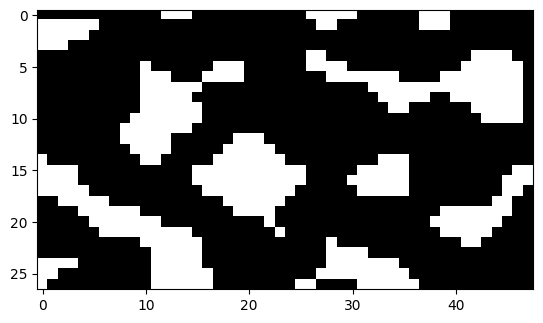

In [3]:
s = RandomSurface(48, 27)
plt.imshow(s.num_grid(), cmap='gray')
plt.show()

In [4]:
grid = s.num_grid()

In [5]:
with open('grid.txt', mode='w') as f:
    for row in grid:
        r = ''.join('#' if x else ' ' for x in row)
        print(r, file=f)
